In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px 
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt

from yellowbrick.target import FeatureCorrelation

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score


%matplotlib inline

# Read Data

In [4]:
spotify_df = pd.read_csv("data/charts-features.csv")
spotify_df.head()

track_id  position                               song_title  \
0  5aAx2yezTd8zXrkmtKl66Z         1                                  Starboy   
1  7BKLCZ1jbUBVqRi2FVlTVw         2                                   Closer   
2  5knuzwU65gJK7IF5yJsuaW         3  Rockabye (feat. Sean Paul & Anne-Marie)   
3  4pdPtRcBmOSQDlJ3Fk945m         4                          Let Me Love You   
4  5MFzQMkrl1FOOng9tq6R9r         5                         Don't Wanna Know   

                     artist     streams  region        date  danceability  \
0     The Weeknd, Daft Punk  25,286,465  global  2016-12-30         0.681   
1  The Chainsmokers, Halsey  22,047,697  global  2016-12-30         0.748   
2              Clean Bandit  19,794,482  global  2016-12-30         0.720   
3   DJ Snake, Justin Bieber  17,965,723  global  2016-12-30         0.476   
4  Maroon 5, Kendrick Lamar  16,966,668  global  2016-12-30         0.783   

   energy  key  ...  instrumentalness  liveness  valence    tempo  \
0   0.594    7  ...          0.000003    0.1340    0.535  186.054   
1   0.524    8  ...          0.000000    0.1110    0.661   95.010   
2   0.763    9  ...          0.000000    0.1800    0.742  101.965   
3   0.718    8  ...          0.000010    0.1220    0.142  199.864   
4   0.623    7  ...          0.000000    0.0975    0.447  100.048   

             type                                   uri  \
0  audio_features  spotify:track:5aAx2yezTd8zXrkmtKl66Z   
1  audio_features  spotify:track:7BKLCZ1jbUBVqRi2FVlTVw   
2  audio_features  spotify:track:5knuzwU65gJK7IF5yJsuaW   
3  audio_features  spotify:track:4pdPtRcBmOSQDlJ3Fk945m   
4  audio_features  spotify:track:5MFzQMkrl1FOOng9tq6R9r   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/5aAx2yezTd8z...   
1  https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...   
2  https://api.spotify.com/v1/tracks/5knuzwU65gJK...   
3  https://api.spotify.com/v1/tracks/4pdPtRcBmOSQ...   
4  https://api.spotify.com/v1/tracks/5MFzQMkrl1FO...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/5aAx...      230453   
1  https://api.spotify.com/v1/audio-analysis/7BKL...      244960   
2  https://api.spotify.com/v1/audio-analysis/5knu...      251088   
3  https://api.spotify.com/v1/audio-analysis/4pdP...      205947   
4  https://api.spotify.com/v1/audio-analysis/5MFz...      214480   

  time_signature  
0              4  
1              4  
2              4  
3              4  
4              4  

[5 rows x 24 columns]

In [5]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          12200 non-null  object 
 1   position          12200 non-null  int64  
 2   song_title        12194 non-null  object 
 3   artist            12194 non-null  object 
 4   streams           12200 non-null  object 
 5   region            12200 non-null  object 
 6   date              12200 non-null  object 
 7   danceability      12200 non-null  float64
 8   energy            12200 non-null  float64
 9   key               12200 non-null  int64  
 10  loudness          12200 non-null  float64
 11  mode              12200 non-null  int64  
 12  speechiness       12200 non-null  float64
 13  acousticness      12200 non-null  float64
 14  instrumentalness  12200 non-null  float64
 15  liveness          12200 non-null  float64
 16  valence           12200 non-null  float6

# Spotify Music Analysis

**Top 10 Artists and Number of Songs in Global Chart**

The bar chart below shows the Top 10 artists in the global chart based on the number of songs included in the chart.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


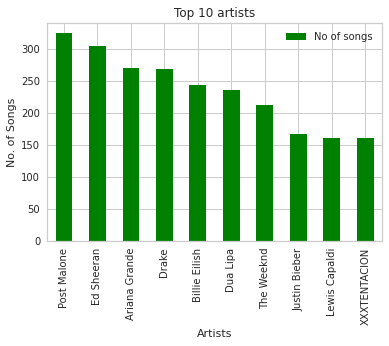

In [6]:
top_artists = pd.DataFrame({'No of songs':spotify_df['artist'].value_counts().head(10)})
top_artists.plot.bar(color='green')
plt.title('Top 10 artists')
plt.xlabel('Artists')
plt.ylabel('No. of Songs')
plt.show()

**Top 10 Artists and Positions in Global Chart**

The bar chart below shows the Top 10 artists in the global chart based on their cummulative position of their songs in the chart.

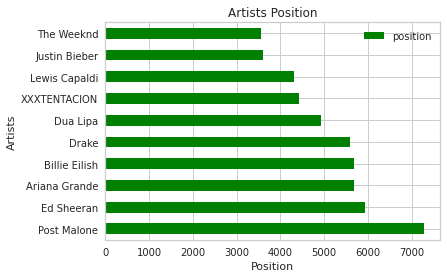

In [7]:
artists = spotify_df.groupby(['artist'])
top_artists_position = artists[['position']].sum().sort_values(by=['position'], ascending=False)[:10]
top_artists_position.plot.barh(color='green')
plt.title('Artists Position')
plt.xlabel('Position')
plt.ylabel('Artists')
plt.show()

**Danceability**

Danceability is how suitable a song is for dancing. A higher value means a higher danceability.

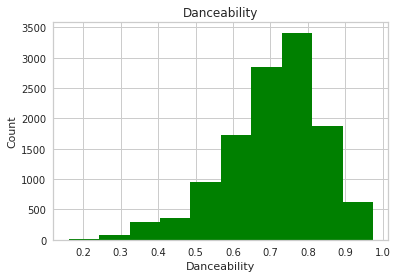

<Figure size 1800x1440 with 0 Axes>

In [8]:
dance = spotify_df.danceability
dance.plot.hist(color='green')
plt.title('Danceability')
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.figure(figsize=(25, 20))
plt.show()

**Energy**

Energy measures intensity and activity. A higher value means the song is typically louder and faster.

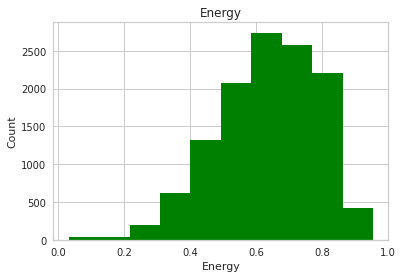

In [9]:
energy = spotify_df.energy
energy.plot.hist(color='green')
plt.title('Energy')
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()

**Speechiness**

Speechiness is the presence of words among the songs. The closer a value is to 1, the more the track is dominated by speech.

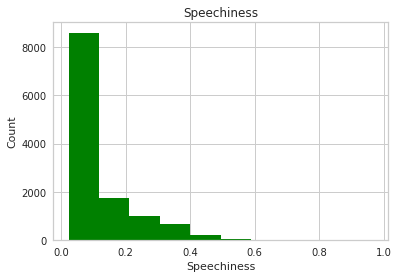

In [10]:
speech = spotify_df.speechiness
speech.plot.hist(color='green')
plt.title('Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Count')
plt.show()

**Acousticness**

Acousticness is a confidence measure of whether a track is acoustic. Higher values mean a track is more acoustic.

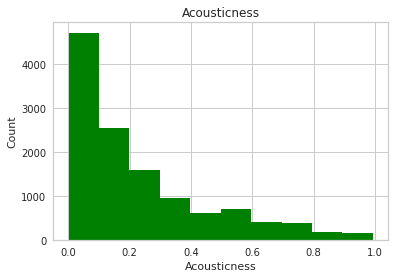

In [11]:
acoustic = spotify_df.acousticness
acoustic.plot.hist(color='green')
plt.title('Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Count')
plt.show()

**Instrumentalness**

Instrumentalness is how little vocals are present in a track. Non-word vocal sounds are still considered instrumental for this criterion. Higher values mean less vocals

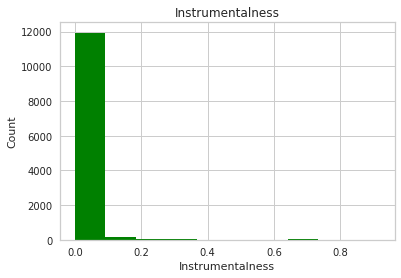

In [12]:
instrumental = spotify_df.instrumentalness
instrumental.plot.hist(color='green')
plt.title('Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Count')
plt.show()

**Liveness**


This is the detection of audience noises in the track. This is more common among live recordings. Values above 0.8 tend to be live performances.

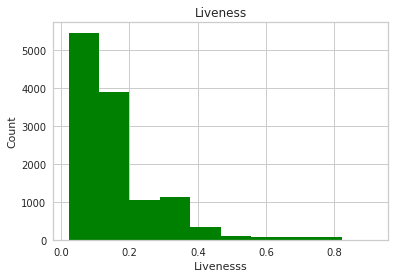

In [13]:
liveness = spotify_df.liveness
liveness.plot.hist(color='green')
plt.title('Liveness')
plt.xlabel('Livenesss')
plt.ylabel('Count')
plt.show()

**Tempo**

Tempo is the average speed or pace of a track measured in beats per minute (BPM)

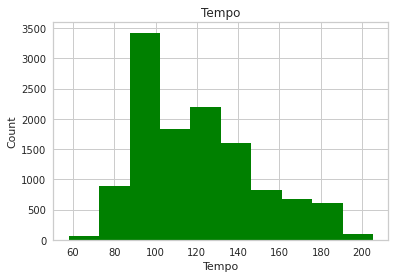

In [14]:
tempo = spotify_df.tempo
tempo.plot.hist(color='green')
plt.title('Tempo')
plt.xlabel('Tempo')
plt.ylabel('Count')
plt.show()

**Valence**

Valence is the postiivity conveyed by the track. Tracks with higher valence values are considered happier tracks.

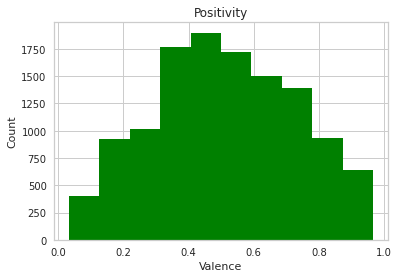

In [15]:
pos = spotify_df.valence
pos.plot.hist(color='green')
plt.title('Positivity')
plt.xlabel('Valence')
plt.ylabel('Count')
plt.show()

**Music Over Time**

We can visualize how the features of most played music has changed from 2016-2021.

In [16]:
spotify_df['date'] = pd.to_datetime(spotify_df['date'])

spotify_2016 = spotify_df[spotify_df['date'].dt.year == 2016]
spotify_2017 = spotify_df[spotify_df['date'].dt.year == 2017]
spotify_2018 = spotify_df[spotify_df['date'].dt.year == 2018]
spotify_2019 = spotify_df[spotify_df['date'].dt.year == 2019]
spotify_2020 = spotify_df[spotify_df['date'].dt.year == 2020]
spotify_2021 = spotify_df[spotify_df['date'].dt.year == 2021]

In [17]:
averages_2016 = pd.DataFrame(spotify_2016[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']].mean()).T
averages_2016.insert(0, "Year", 2016)
averages_2017 = pd.DataFrame(spotify_2017[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']].mean()).T
averages_2017.insert(0, "Year", 2017)
averages_2018 = pd.DataFrame(spotify_2018[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']].mean()).T
averages_2018.insert(0, "Year", 2018)
averages_2019 = pd.DataFrame(spotify_2019[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']].mean()).T
averages_2019.insert(0, "Year", 2019)
averages_2020 = pd.DataFrame(spotify_2020[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']].mean()).T
averages_2020.insert(0, "Year", 2020)
averages_2021 = pd.DataFrame(spotify_2021[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']].mean()).T
averages_2021.insert(0, "Year", 2021)

In [18]:
spotify_years = pd.concat([averages_2016, averages_2017, averages_2018, averages_2019, averages_2020, averages_2021], axis=0)


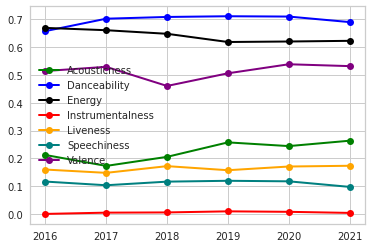

In [19]:
over_time=pd.DataFrame({'x': spotify_years['Year'], 'Acousticness': spotify_years['acousticness'], 'Danceability': spotify_years['danceability'], 'Energy': spotify_years['energy'], 'Instrumentalness': spotify_years['instrumentalness'], 'Liveness': spotify_years['liveness'], 'Speechiness': spotify_years['speechiness'], 'Valence': spotify_years['valence'],})
 
plt.plot( 'x', 'Acousticness', data=over_time, marker='o', color='green', linewidth=2)
plt.plot( 'x', 'Danceability', data=over_time, marker='o', color='blue', linewidth=2)
plt.plot( 'x', 'Energy', data=over_time, marker='o', color='black', linewidth=2)
plt.plot( 'x', 'Instrumentalness', data=over_time, marker='o', color='red', linewidth=2)
plt.plot( 'x', 'Liveness', data=over_time, marker='o', color='orange', linewidth=2)
plt.plot( 'x', 'Speechiness', data=over_time, marker='o', color='teal', linewidth=2)
plt.plot( 'x', 'Valence', data=over_time, marker='o', color='purple', linewidth=2)

plt.legend()
plt.show()

**Check For Feature Correlation**

Song valence, accousticness, speechlessness, mode, loudness, and energy are positively correlated to a song's position in the global chart. 

In contrast, a song's duration, tempo, liveliness, instrumentalness, key, and danceability have negative correlation to its position in the global chart.

FeatureCorrelation(ax=<AxesSubplot:>,
                   labels=array(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'], dtype='<U16'))

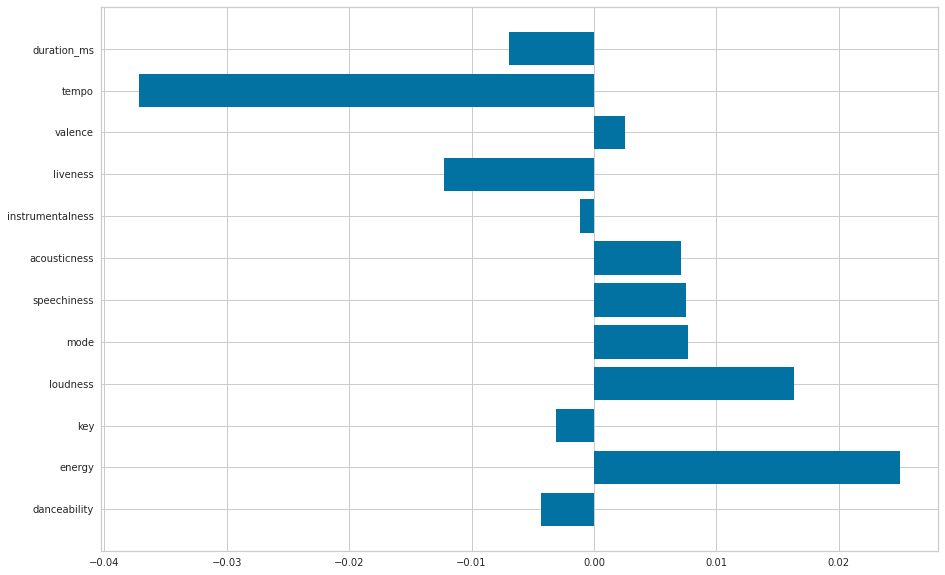

In [20]:
feature_names = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                 'tempo', 'duration_ms']

x, y = spotify_df[feature_names], spotify_df['position']

features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(15,10) 
visualizer.fit(x, y)  

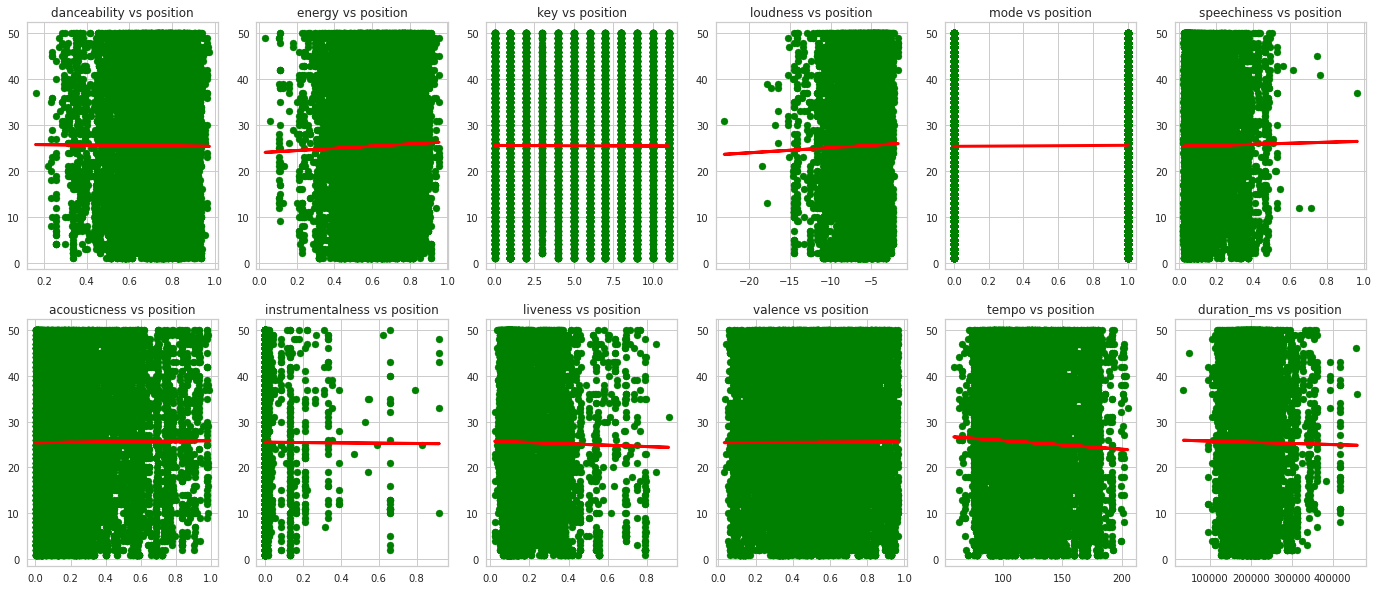

In [21]:
plt.figure(0, figsize=(24,10))
x_axis = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                 'tempo', 'duration_ms']
z = 0
for i in range(2):
    for j in range(6):
        
        x = spotify_df[x_axis[z]].values.reshape(-1,1)
        y = spotify_df["position"].values.reshape(-1,1)
        
        reg = LinearRegression()
        reg.fit(x, y)
        
        ax = plt.subplot2grid((2,6), (i,j))
        ax.scatter(x,y, c='green')
        
        ax.plot(x, reg.predict(x), color="red", linewidth=3, linestyle='-')
        
        ax.title.set_text(f'{x_axis[z]} vs position')
        z += 1
plt.show()

# Cluster Songs Using K Means

Similar songs are located closely together.

In [22]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=2, n_jobs=4))],verbose=True)

x = spotify_df.select_dtypes(np.number)
number_cols = list(x.columns)
song_cluster_pipeline.fit(x)
song_cluster_labels = song_cluster_pipeline.predict(x)
spotify_df['cluster_label'] = song_cluster_labels

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
Initialization complete
Iteration 0, inertia 119218.31956950281
Iteration 1, inertia 90156.42648739788
Iteration 2, inertia 87113.9366713902
Iteration 3, inertia 85695.5201489919
Iteration 4, inertia 84733.4453133013
Iteration 5, inertia 84262.82168692863
Iteration 6, inertia 83878.26183828429
Iteration 7, inertia 83366.78732825651
Iteration 8, inertia 83073.25452520551
Iteration 9, inertia 82993.66602500975
Iteration 10, inertia 82953.72158246586
Iteration 11, inertia 82914.3336561592
Iteration 12, inertia 82886.56982583794
Iteration 13, inertia 82853.86515510209
Iteration 14, inertia 82823.90930152748
Iteration 15, inertia 82785.91426840451
Iteration 16, inertia 82760.19785559563
Iteration 17, inertia 82746.62126426872
Iteration 18, inertia 82738.70415486537
Iteration 19, inertia 82731.26940167279
Iteration 20, inertia 82724.61216122139
Iteration 21, inertia 82719.28750038633
Iteration 22, inertia 82713.9021760499

/home/enzorooo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 42, inertia 82527.43113284028
Iteration 43, inertia 82526.65733066808
Iteration 44, inertia 82523.7180823665
Iteration 45, inertia 82521.4648771912
Iteration 46, inertia 82520.49083395711
Iteration 47, inertia 82519.0878016469
Iteration 48, inertia 82518.10747371544
Iteration 49, inertia 82517.34806784782
Iteration 50, inertia 82516.4735317448
Iteration 51, inertia 82515.85743679416
Iteration 52, inertia 82513.78904365117
Iteration 53, inertia 82512.95423271008
Iteration 54, inertia 82512.22374216607
Iteration 55, inertia 82511.91208864473
Iteration 56, inertia 82511.76309756105
Converged at iteration 56: center shift 3.079594923074078e-05 within tolerance 0.0001000000000000004.
Initialization complete
Iteration 0, inertia 114037.21369212751
Iteration 1, inertia 91597.18569682896
Iteration 2, inertia 88025.23803355727
Iteration 3, inertia 86288.35191492972
Iteration 4, inertia 85311.75250751477
Iteration 5, inertia 84099.20072116541
Iteration 6, inertia 82873.30024469687
Iter

Iteration 22, inertia 82668.59456431164
Iteration 23, inertia 82650.90757243274
Iteration 24, inertia 82637.70312985797
Iteration 25, inertia 82622.09953496726
Iteration 26, inertia 82613.60094276509
Iteration 27, inertia 82604.98597962802
Iteration 28, inertia 82594.3670008108
Iteration 29, inertia 82577.10358451569
Iteration 30, inertia 82567.50444927865
Iteration 31, inertia 82559.30417939679
Iteration 32, inertia 82543.6082276435
Iteration 33, inertia 82524.84789053125
Iteration 34, inertia 82516.91973646534
Iteration 35, inertia 82508.96461808283
Iteration 36, inertia 82503.33634120696
Iteration 37, inertia 82499.04251034216
Iteration 38, inertia 82495.26918795398
Iteration 39, inertia 82489.57140704307
Iteration 40, inertia 82482.22625234193
Iteration 41, inertia 82475.02376916866
Iteration 42, inertia 82468.90019861962
Iteration 43, inertia 82462.96759811784
Iteration 44, inertia 82437.77837673509
Iteration 45, inertia 82399.29158363189
Iteration 46, inertia 82362.87341366302
It

In [23]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(x)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = spotify_df['song_title']
projection['cluster'] = spotify_df['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

# Predicting Top 10 via Logistic Regression

In [24]:
log_df = spotify_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                 'tempo', 'duration_ms']]
log_y = spotify_df['position'].copy()
log_y.loc[log_y <= 10] = 1
log_y.loc[log_y > 10] = 0

X_train, X_test, y_train, y_test = train_test_split(log_df, log_y, test_size=0.2, random_state=42)

In [25]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print(f"Train Set Score: {score:.2%}")

Train Set Score: 80.12%


In [26]:
score = clf.score(X_test, y_test)
print(f"Test Set Score: {score:.2%}")

Test Set Score: 79.51%


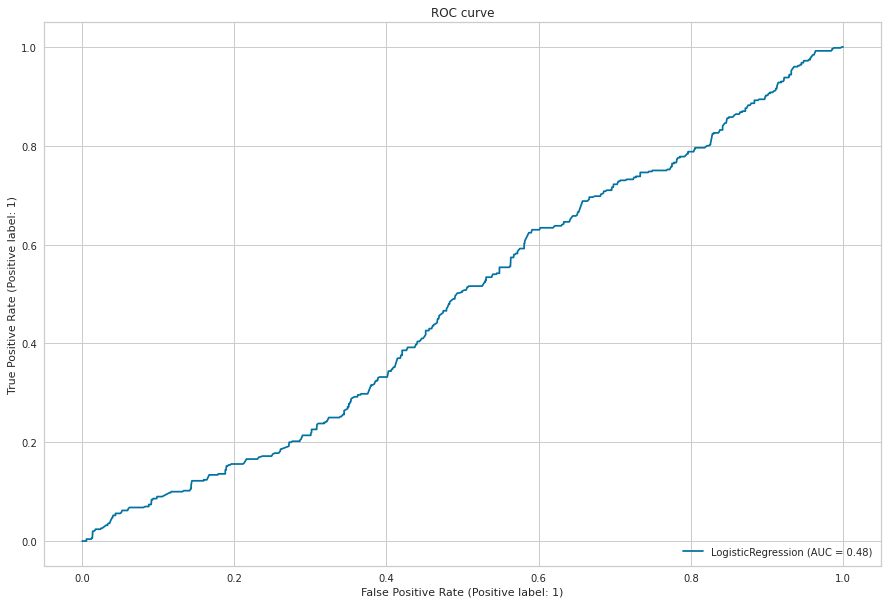

In [27]:
log_disp = plot_roc_curve(clf, X_test, y_test)
plt.title('ROC curve')
plt.show()

No handles with labels found to put in legend.


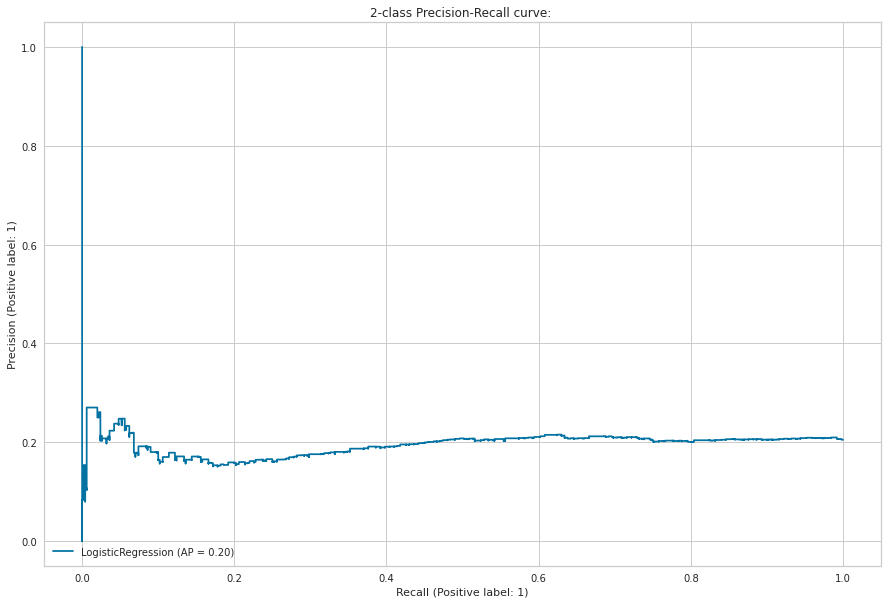

In [28]:
log_PR = plot_precision_recall_curve(clf, X_test, y_test)
log_PR.ax_.set_title('2-class Precision-Recall curve: ')
ax.legend(loc='upper right')

# Predicting Top 10 via KNearestNeighbors Classifer

In [29]:
#KNN Regression does not have a high score
clf = KNeighborsClassifier(n_neighbors=3, p=2, n_jobs=-1)
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print(f"Test Set Score: {score:.2%}")

Test Set Score: 82.61%


In [30]:
score = clf.score(X_test, y_test)
print(f"Test Set Score: {score:.2%}")

Test Set Score: 80.29%


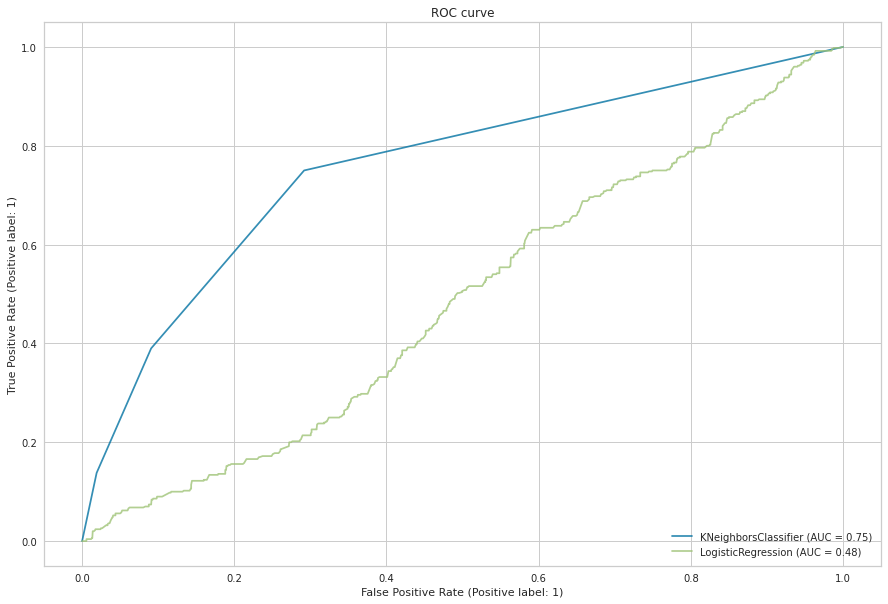

In [31]:
ax = plt.gca()
knn_disp = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8)
log_disp.plot(ax=ax, alpha=0.8)
plt.title('ROC curve')
plt.show()

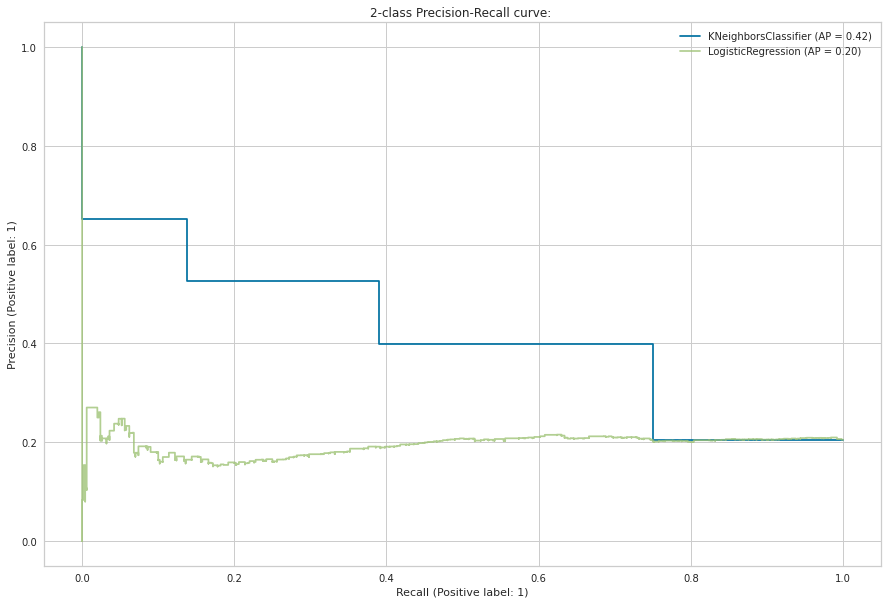

In [32]:
ax = plt.gca()
knn_PR = plot_precision_recall_curve(clf, X_test, y_test, ax=ax)
ax.set_title('2-class Precision-Recall curve: ')
log_PR.plot(ax=ax, alpha=0.8)
ax.legend(loc='upper right')

# Predicting Top 10 via Support Vector Classification

In [33]:
clf = SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print(f"Test Set Score: {score:.2%}")

Test Set Score: 80.12%


In [34]:
score = clf.score(X_test, y_test)
print(f"Test Set Score: {score:.2%}")

Test Set Score: 79.51%


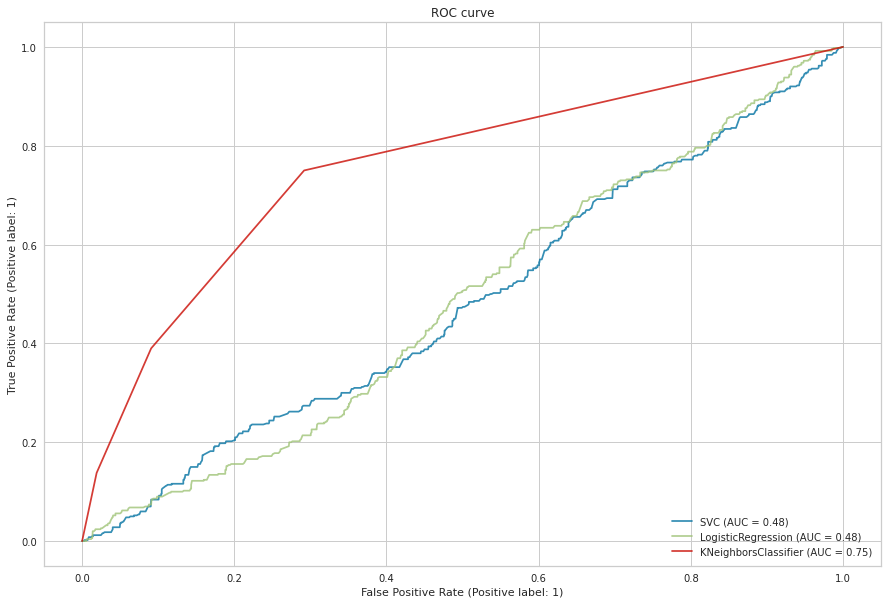

In [35]:
ax = plt.gca()
svc_disp = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8)
log_disp.plot(ax=ax, alpha=0.8)
knn_disp.plot(ax=ax, alpha=0.8)
plt.title('ROC curve')
plt.show()

With consideration to the graph above, we can say that utilizing KNN classifier is more reliable than the other models because the area under its ROC curve is the largest which means that it has the highest probability of ranking a top 10 song above a non-top 10 song. Along with both the Support Vector Classification and Logistic Regression models having scores under 0.5 which means they are slightly worse than flipping a coin for determining top 10 songs.

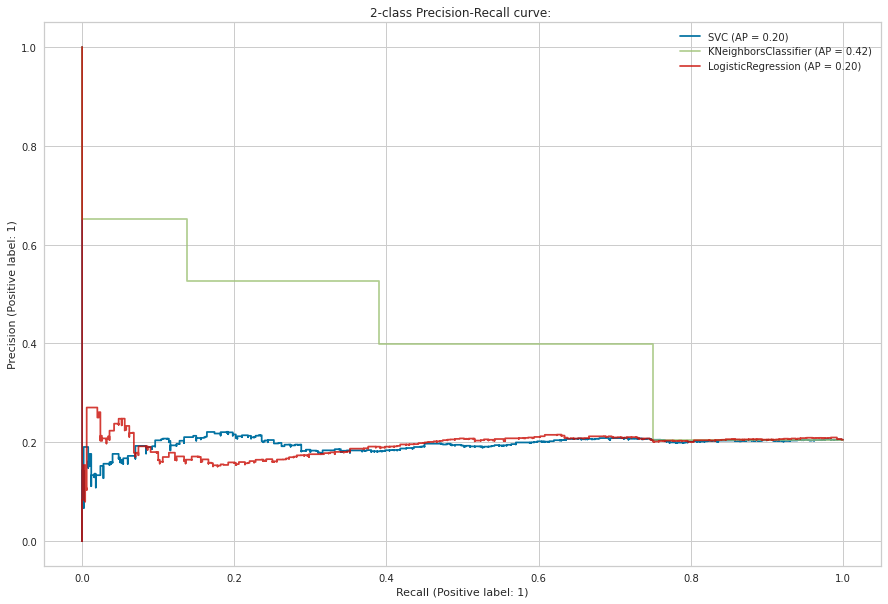

In [36]:
ax = plt.gca()
svc_PR = plot_precision_recall_curve(clf, X_test, y_test, ax=ax)
ax.set_title('2-class Precision-Recall curve: ')
knn_PR.plot(ax=ax, alpha=0.8)
log_PR.plot(ax=ax, alpha=0.8)
ax.legend(loc='upper right')

The compiled precision recall curves show that among the three models used, the KNN classifer is the most trustworthy model we have for identifying top 10 worthy songs as it has the best average precision which is the probability of songs it classifies as top 10 as being actually top 10. Take note that Recall here is the same as True Positive rate in the ROC curves.

# References

Giridih, J. (2020). 
Spotify Analysis (Starman). Retrieved from https://www.kaggle.com/darkstardream/spotify-analysis-starman


Surat, Gu. (2021). 
Music Recommendation System using Spotify Dataset. Retrieved from https://www.kaggle.com/vatsalmavani/music-recommendation-system-using-spotify-dataset